In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')


In [16]:
zam_path = "./Dane/zam_123.xlsx"

In [17]:
raw = pd.read_excel(zam_path)

In [18]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93409 entries, 0 to 93408
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   OPIS                93408 non-null  object        
 1   ILOSC               93409 non-null  float64       
 2   ARTYKUL_KOD         93409 non-null  object        
 3   FAMILY_OPIS         93409 non-null  object        
 4   NAZWA2              93408 non-null  object        
 5   LISTA_ZAL_DATA_WYS  93409 non-null  datetime64[ns]
 6   ILOSC_SIEDZISK      93409 non-null  int64         
 7   KLIENCI_OPIS        93409 non-null  object        
 8   ZAMOWIENIE_DATA_WP  93409 non-null  datetime64[ns]
 9   NR_KOMISJI          93408 non-null  object        
 10  ZESTAWY_ID          54732 non-null  float64       
 11  ZAMOWIENIE_Z_DNIA   93409 non-null  datetime64[ns]
 12  PP                  93294 non-null  object        
 13  LISTA_ZAL_KOD       93409 non-null  object    

In [58]:
data = raw.copy()

data["NAZWA2"] = data.NAZWA2.fillna("").str.strip()
data["LISTA_ZAL_DATA_WYS"] = pd.to_datetime(data.LISTA_ZAL_DATA_WYS, errors="coerce")
data["NR_KOMISJI"] = data.NR_KOMISJI.apply(lambda x: str(x).split("/")[0])
data["CENA_NETTO"] = data.CENA_NETTO.fillna(0)


In [59]:
data.KLIENCI_OPIS.value_counts()

KLIENCI_OPIS
SYMPA S.A.                                            52373
CHATTELS AND MORE LLC                                 11545
ITALMEBLE WARSZAWA D. BAŁKA, J. KRASOWSKI S.C.         3201
OLTA CONCEPT STORE KLAUDIA ZAWISTOWSKA-RYCHŁA          2980
ITALMEBLE WROCŁAW DOMAR                                2551
ITALMEBLE WROCŁAW BIELANY                              2467
ITALMEBLE POZNAŃ                                       2353
ITALMEBLE KATOWICE                                     2264
ITALMEBLE GDAŃSK                                       2170
ITALMEBLE WARSZAWA SP. Z O.O                           1906
ITALMEBLE JANKI                                        1774
ETAB INTERNATIONAL Co.                                 1311
NATURA DESIGN LTD                                      1073
GOTTI SP. Z O.O.                                        676
ITALMEBLE  DAMIAN BIELECKI SP.K.                        632
SYGNEA S.R.O.                                           591
UAB DUSETAI                

In [60]:
# Policz liczbę wystąpień dla każdego klienta
client_counts = data['KLIENCI_OPIS'].value_counts()

# Filtrujemy klientów, którzy mają więcej niż 100 wystąpień
clients_above_100 = client_counts[client_counts > 100].index

# Filtrowanie danych, aby zostawić tylko klientów z więcej niż 100 wystąpień
data = data[data['KLIENCI_OPIS'].isin(clients_above_100)]
data.KLIENCI_OPIS.unique()

array(['SYMPA S.A.                                        ',
       'SYGNEA S.R.O.                                     ',
       'OLTA CONCEPT STORE KLAUDIA ZAWISTOWSKA-RYCHŁA     ',
       'CHATTELS AND MORE LLC                             ',
       'ITALMEBLE WARSZAWA D. BAŁKA, J. KRASOWSKI S.C.    ',
       'INTERNO S.C. K. OFAT-WOJCIESZEK, R. TOMCZAK       ',
       'ITALMEBLE JANKI                                   ',
       'ITALMEBLE WROCŁAW BIELANY                         ',
       'ITALMEBLE KATOWICE                                ',
       'ITALMEBLE POZNAŃ                                  ',
       'ITALMEBLE WROCŁAW DOMAR                           ',
       'ITALMEBLE GDAŃSK                                  ',
       'BARBARA ZIERNICKA GENUA MEBLE                     ',
       'DOM DECOR / KBM Ltd                               ',
       'NATURA DESIGN LTD                                 ',
       'MILANO INTERNATIONAL TRADING CORPORATION          ',
       'OLTA K.K. ZAWIST

In [61]:
klienci_opis = {      
       'SYMPA S.A.                                        ': {"KLIENT": "SYM", "WALUTA": "EUR"},
       'SYGNEA S.R.O.                                     ': {"KLIENT": "SYG", "WALUTA": "EUR"},
       'OLTA CONCEPT STORE KLAUDIA ZAWISTOWSKA-RYCHŁA     ': {"KLIENT": "OCS", "WALUTA": "PLN"},
       'CHATTELS AND MORE LLC                             ': {"KLIENT": "CAM", "WALUTA": "EUR"},
       'INTERNO S.C. K. OFAT-WOJCIESZEK, R. TOMCZAK       ': {"KLIENT": "INT", "WALUTA": "PLN"},
       'ITALMEBLE WARSZAWA D. BAŁKA, J. KRASOWSKI S.C.    ': {"KLIENT": "ITA", "WALUTA": "PLN"},
       'ITALMEBLE JANKI                                   ': {"KLIENT": "ITA", "WALUTA": "PLN"},
       'ITALMEBLE WROCŁAW BIELANY                         ': {"KLIENT": "ITA", "WALUTA": "PLN"},
       'ITALMEBLE KATOWICE                                ': {"KLIENT": "ITA", "WALUTA": "PLN"},
       'ITALMEBLE POZNAŃ                                  ': {"KLIENT": "ITA", "WALUTA": "PLN"},
       'ITALMEBLE WROCŁAW DOMAR                           ': {"KLIENT": "ITA", "WALUTA": "PLN"},
       'ITALMEBLE GDAŃSK                                  ': {"KLIENT": "ITA", "WALUTA": "PLN"},
       'BARBARA ZIERNICKA GENUA MEBLE                     ': {"KLIENT": "GEN", "WALUTA": "PLN"},
       'DOM DECOR / KBM Ltd                               ': {"KLIENT": "DOM", "WALUTA": "PLN"},
       'NATURA DESIGN LTD                                 ': {"KLIENT": "NAT", "WALUTA": "EUR"},
       'MILANO INTERNATIONAL TRADING CORPORATION          ': {"KLIENT": "MIL", "WALUTA": "EUR"},
       'OLTA K.K. ZAWISTOWSCY SP.K.                       ': {"KLIENT": "OSP", "WALUTA": "PLN"},
       'UAB DUSETAI                                       ': {"KLIENT": "UAB", "WALUTA": "EUR"},
       'SEVERINS MOBLER I JONKOPING AB                    ': {"KLIENT": "SEV", "WALUTA": "EUR"},
       'GOTTI ANDRZEJ MĄKA                                ': {"KLIENT": "GOT", "WALUTA": "PLN"},
       'STE VOGUE FURNITURE                               ': {"KLIENT": "STE", "WALUTA": "EUR"},
       'ITALMEBLE  DAMIAN BIELECKI SP.K.                  ': {"KLIENT": "ITA", "WALUTA": "PLN"},
       'GOTTI SP. Z O.O.                                  ': {"KLIENT": "GOT", "WALUTA": "PLN"},
       'ITALMEBLE WARSZAWA SP. Z O.O                      ': {"KLIENT": "ITA", "WALUTA": "PLN"},
       'ETAB INTERNATIONAL Co.                            ': {"KLIENT": "ETA", "WALUTA": "EUR"},
       'MEBLOSFERA SPÓŁKA Z O.O                           ': {"KLIENT": "MEB", "WALUTA": "PLN"}}

In [62]:
klient_map = {k: v["KLIENT"] for k, v in klienci_opis.items()}
waluta_map = {k: v["WALUTA"] for k, v in klienci_opis.items()}

data['KLIENT'] = data['KLIENCI_OPIS'].map(klient_map)
data['WALUTA'] = data['KLIENCI_OPIS'].map(waluta_map)

def cena_pln(cena_netto, waluta):
    if waluta == "PLN":
        return cena_netto
    else:
        return cena_netto * 4.2

data["CENA_PLN"] = data.apply(lambda x: cena_pln(x.CENA_NETTO, x.WALUTA), axis=1)

In [63]:
data.KLIENT.value_counts()

KLIENT
SYM    52373
ITA    19318
CAM    11545
OCS     2980
ETA     1311
NAT     1073
GOT      844
SYG      591
UAB      536
GEN      439
MIL      370
OSP      359
INT      338
DOM      297
STE      216
SEV      117
MEB      112
Name: count, dtype: int64

In [64]:
data.query("WALUTA == 'EUR'").groupby("KLIENT").agg({"CENA_NETTO": ["max", "min", "mean", "count", "std"]}).sort_values(("CENA_NETTO", "count"))

CENA_NETTO                                       
              max    min         mean  count         std
KLIENT                                                  
SEV        2550.0   0.00   665.264957    117  660.255520
STE        2667.0  28.00  1031.189815    216  701.151495
MIL        3008.0  24.24   996.868216    370  665.167668
UAB        2755.0   0.00  1349.398153    536  608.118098
SYG        3459.0   0.00  1330.187073    591  710.912036
NAT        3610.0   0.00  1218.900969   1073  778.495738
ETA        2928.0  56.00  1556.973303   1311  677.472127
CAM        3089.0   0.00  1061.172113  11545  586.759938
SYM       12681.0   0.00   539.019541  52373  502.513851

In [65]:
data.query("WALUTA == 'PLN'").groupby("KLIENT").agg({"CENA_NETTO": ["max", "min", "mean", "count", "std"]}).sort_values(("CENA_NETTO", "count"))

CENA_NETTO                                       
              max   min         mean  count          std
KLIENT                                                  
MEB        4362.0   0.0  2435.160714    112   981.584503
DOM        2685.0   1.0  1236.268114    297   619.418715
INT        4959.0  27.0  1950.113905    338   845.737065
OSP        4113.0   0.0  1492.896936    359  1296.867654
GEN        5278.0   0.0  2195.970387    439  1241.513063
GOT        5362.0   0.0  2436.256517    844  1245.826462
OCS        6431.0   0.0  2045.065352   2980  1357.577078
ITA        7283.0   0.0  2152.504730  19318  1225.261066

In [66]:
data.groupby("KLIENT").agg({"CENA_NETTO": ["max", "min", "mean", "count", "std"]}).sort_values(("CENA_NETTO", "count"))

CENA_NETTO                                        
              max    min         mean  count          std
KLIENT                                                   
MEB        4362.0   0.00  2435.160714    112   981.584503
SEV        2550.0   0.00   665.264957    117   660.255520
STE        2667.0  28.00  1031.189815    216   701.151495
DOM        2685.0   1.00  1236.268114    297   619.418715
INT        4959.0  27.00  1950.113905    338   845.737065
OSP        4113.0   0.00  1492.896936    359  1296.867654
MIL        3008.0  24.24   996.868216    370   665.167668
GEN        5278.0   0.00  2195.970387    439  1241.513063
UAB        2755.0   0.00  1349.398153    536   608.118098
SYG        3459.0   0.00  1330.187073    591   710.912036
GOT        5362.0   0.00  2436.256517    844  1245.826462
NAT        3610.0   0.00  1218.900969   1073   778.495738
ETA        2928.0  56.00  1556.973303   1311   677.472127
OCS        6431.0   0.00  2045.065352   2980  1357.577078
CAM        3089.0   0.00  1061.172113  11545   586.759938
ITA        7283.0   0.00  2152.504730  19318  1225.261066
SYM       12681.0   0.00   539.019541  52373   502.513851

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92819 entries, 10 to 93408
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   OPIS                92818 non-null  object        
 1   ILOSC               92819 non-null  float64       
 2   ARTYKUL_KOD         92819 non-null  object        
 3   FAMILY_OPIS         92819 non-null  object        
 4   NAZWA2              92819 non-null  object        
 5   LISTA_ZAL_DATA_WYS  92819 non-null  datetime64[ns]
 6   ILOSC_SIEDZISK      92819 non-null  int64         
 7   KLIENCI_OPIS        92819 non-null  object        
 8   ZAMOWIENIE_DATA_WP  92819 non-null  datetime64[ns]
 9   NR_KOMISJI          92819 non-null  object        
 10  ZESTAWY_ID          54407 non-null  float64       
 11  ZAMOWIENIE_Z_DNIA   92819 non-null  datetime64[ns]
 12  PP                  92704 non-null  object        
 13  LISTA_ZAL_KOD       92819 non-null  object        

In [68]:
grupa_art = pd.pivot_table(data=data, 
                            index=["FAMILY_OPIS", "NAZWA2"], 
                            # values=["ILOSC", "CENA_NETTO"], 
                            aggfunc={"ILOSC":["count", "max", "min"], "CENA_PLN": ["sum", "mean", "std"]}).reset_index()

grupa_art.columns = ["_".join(x) for x in grupa_art.columns]


def grupa_abc(family_opis, nazwa2):
  grupa_abc = data[(data.FAMILY_OPIS == family_opis)].copy()

  grupa_abc = grupa_abc.groupby(["NAZWA2"], as_index=False).agg({"CENA_PLN": "sum"})

  if grupa_abc.empty:  
    return "Brak danych"


  grupa_abc["sum_kategorii"] = grupa_abc.CENA_PLN.sum()
  grupa_abc["prc"] = grupa_abc.CENA_PLN / grupa_abc.sum_kategorii

  grupa_abc = grupa_abc.sort_values(by=["CENA_PLN"], ascending=False)
  grupa_abc["prc_sum"] = grupa_abc.prc.cumsum()

  def _abc(x):
    if x <= 0.8:
      return "A"
    elif x <= 0.95:
      return "B"
    else:
      return "C"

  grupa_abc["Grupa_ABC"] = grupa_abc.prc_sum.apply(_abc)

  return grupa_abc[grupa_abc.NAZWA2 == nazwa2].Grupa_ABC.values[0]


def grupa_xyz(family_opis, nazwa2):
  grupa_xyz = data[(data.ILOSC > 0) & (data.FAMILY_OPIS == family_opis)].copy()

  grupa_xyz = grupa_xyz.groupby(["NAZWA2"], as_index=False).agg({"ILOSC": "sum"})
  grupa_xyz["sum_kategorii"] = grupa_xyz.ILOSC.sum()
  grupa_xyz["prc"] = grupa_xyz.ILOSC / grupa_xyz.sum_kategorii

  grupa_xyz = grupa_xyz.sort_values(by=["ILOSC"], ascending=False)
  grupa_xyz["prc_sum"] = grupa_xyz.prc.cumsum()

  def _xyz(x):
    if x <= 0.75:
      return "X"
    elif x <= 0.9:
      return "Y"
    else:
      return "Z"

  
  grupa_xyz["Grupa_XYZ"] = grupa_xyz.prc_sum.apply(_xyz)

  return grupa_xyz[grupa_xyz.NAZWA2 == nazwa2].Grupa_XYZ.values[0]

grupa_art["GRUPA_ABC"] = grupa_art.apply(lambda x: grupa_abc(x.FAMILY_OPIS_, x.NAZWA2_), axis=1)
grupa_art["GRUPA_XYZ"] = grupa_art.apply(lambda x: grupa_xyz(x.FAMILY_OPIS_, x.NAZWA2_), axis=1)

In [69]:
grupa_art.query("FAMILY_OPIS_ == 'HORIZON A'").sort_values("ILOSC_count", ascending=False)

,FAMILY_OPIS_,NAZWA2_,CENA_PLN_mean,CENA_PLN_std,CENA_PLN_sum,ILOSC_count,ILOSC_max,ILOSC_min,GRUPA_ABC,GRUPA_XYZ
567,HORIZON A,L2Hz],4342.283255,2258.765418,3682256.20,848,1.0,1.0,A,X
570,HORIZON A,ONz,3922.686538,1965.450351,2855715.80,728,1.0,1.0,A,X
588,HORIZON A,"[3,5z",3281.796769,1722.545825,2031432.20,619,1.0,1.0,A,X
592,HORIZON A,[L2Hz,4225.120517,2188.617604,2615349.60,619,1.0,1.0,A,X
568,HORIZON A,LHz],3971.267206,2021.724509,1961806.00,494,1.0,1.0,A,X
563,HORIZON A,"3,5z]",3294.188161,1678.525825,1558151.00,473,1.0,1.0,A,X
590,HORIZON A,[3z,2989.397820,1524.691672,1097109.00,367,1.0,1.0,A,X
593,HORIZON A,[LHz,3407.064463,1756.292441,1236764.40,363,1.0,1.0,A,X
584,HORIZON A,"[1,5z",3081.514114,1320.722997,1026144.20,333,1.0,1.0,A,X
564,HORIZON A,3z,3427.416413,1704.243946,1127620.00,329,1.0,1.0,A,X


In [70]:
data.columns

Index(['OPIS', 'ILOSC', 'ARTYKUL_KOD', 'FAMILY_OPIS', 'NAZWA2',
       'LISTA_ZAL_DATA_WYS', 'ILOSC_SIEDZISK', 'KLIENCI_OPIS',
       'ZAMOWIENIE_DATA_WP', 'NR_KOMISJI', 'ZESTAWY_ID', 'ZAMOWIENIE_Z_DNIA',
       'PP', 'LISTA_ZAL_KOD', 'REALIZ_UWAGA', 'CENA_NETTO', 'KLIENT', 'WALUTA',
       'CENA_PLN'],
      dtype='object')

In [72]:

# Sumowanie sprzedaży dla każdej bryły w modelu
grupa_art = data.groupby(["FAMILY_OPIS", "NAZWA2"]).agg({"CENA_PLN": ["mean", "std", "sum"], "ILOSC": ["count", "max", "min", "sum"]}).reset_index()
grupa_art.columns = ["_".join(x) for x in grupa_art.columns]

grupa_art["Total_ILOSC_sum"] = grupa_art.groupby("FAMILY_OPIS_")["ILOSC_sum"].transform("sum")
grupa_art["ILOSC_prc"] = grupa_art["ILOSC_sum"] / grupa_art["Total_ILOSC_sum"]
grupa_art = grupa_art.sort_values(by=["FAMILY_OPIS_", "ILOSC_prc"], ascending=[True, False])
grupa_art["ILOSC_prc_cumsum"] = grupa_art.groupby("FAMILY_OPIS_")["ILOSC_prc"].cumsum()
grupa_art["GRUPA_XYZ"] = np.where(grupa_art["ILOSC_prc_cumsum"] <= 0.65, "X",
                               np.where(grupa_art["ILOSC_prc_cumsum"] <= 0.9, "Y", "Z"))

grupa_art["Total_CENA_sum"] = grupa_art.groupby("FAMILY_OPIS_")["CENA_PLN_sum"].transform("sum")
grupa_art["CENA_prc"] = grupa_art["CENA_PLN_sum"] / grupa_art["Total_CENA_sum"]
grupa_art = grupa_art.sort_values(by=["FAMILY_OPIS_", "CENA_prc"], ascending=[True, False])
grupa_art["CENA_prc_cumsum"] = grupa_art.groupby("FAMILY_OPIS_")["CENA_prc"].cumsum()
grupa_art["GRUPA_ABC"] = np.where(grupa_art["CENA_prc_cumsum"] <= 0.80, "A",
                               np.where(grupa_art["CENA_prc_cumsum"] <= 0.95, "B", "C"))

grupa_art.drop(["Total_ILOSC_sum", "ILOSC_prc", "ILOSC_prc_cumsum", "Total_CENA_sum", "CENA_prc", "CENA_prc_cumsum"], axis=1, inplace=True)

grupa_art.query("FAMILY_OPIS_ == 'AVANT'")

,FAMILY_OPIS_,NAZWA2_,CENA_PLN_mean,CENA_PLN_std,CENA_PLN_sum,ILOSC_count,ILOSC_max,ILOSC_min,ILOSC_sum,GRUPA_XYZ,GRUPA_ABC
76,AVANT,N,3019.165529,1266.791773,5220137.2,1729,1.0,1.0,1729.0,X,A
61,AVANT,"1,5",2566.922629,1230.417585,4492114.6,1750,1.0,1.0,1750.0,X,A
97,AVANT,"[3,5]",5815.015894,2311.283169,3512269.6,604,1.0,1.0,604.0,X,A
87,AVANT,"[1,5",3415.254045,1358.835618,1984262.6,581,1.0,1.0,581.0,X,A
62,AVANT,"1,5]",3534.063720,1337.113521,1918996.6,543,1.0,1.0,543.0,X,A
94,AVANT,[3,3509.754245,1731.744273,1488135.8,424,1.0,1.0,424.0,X,A
95,AVANT,"[3,5",3525.414555,1354.541620,1307928.8,371,1.0,1.0,371.0,Y,A
71,AVANT,"3,5]",3694.537725,1624.050449,1233975.6,334,1.0,1.0,334.0,Y,A
75,AVANT,L],2957.711057,1531.124708,1203788.4,407,1.0,1.0,407.0,X,A
73,AVANT,3],3288.348837,1478.133671,1131192.0,344,1.0,1.0,344.0,Y,A


In [32]:
data.describe()

,ILOSC,LISTA_ZAL_DATA_WYS,ILOSC_SIEDZISK,ZAMOWIENIE_DATA_WP,ZESTAWY_ID,ZAMOWIENIE_Z_DNIA,CENA_NETTO,CENA_PLN
count,92819.000000,92819,92819.000000,92819,54407.000000,92819,92819.000000,92819.000000
mean,1.178496,2022-07-13 07:47:17.018282752,16.442883,2022-04-30 23:13:46.085176576,56555.625214,2022-04-26 06:31:47.531863040,1061.644902,2647.844534
min,0.500000,2020-01-03 00:00:00,0.000000,2019-04-16 00:00:00,20708.000000,2019-04-16 00:00:00,0.000000,0.000000
25%,1.000000,2021-05-27 00:00:00,6.000000,2021-02-15 00:00:00,43837.000000,2021-02-12 00:00:00,288.000000,1075.200000
50%,1.000000,2022-06-27 00:00:00,13.000000,2022-04-04 00:00:00,58211.000000,2022-03-31 00:00:00,636.000000,2209.200000
75%,1.000000,2023-09-11 00:00:00,26.000000,2023-07-03 00:00:00,69721.000000,2023-06-30 00:00:00,1574.000000,3469.200000
max,150.000000,2025-02-03 00:00:00,50.000000,2024-11-05 00:00:00,80845.000000,2024-11-05 00:00:00,12681.000000,53260.200000
std,1.400396,NaN,12.699860,NaN,15378.242190,NaN,1038.731845,2245.406281


In [75]:
from datetime import datetime as dt

data["RokMiesiac"] = data.LISTA_ZAL_DATA_WYS.dt.to_period("M")
data["Rok"] = data.LISTA_ZAL_DATA_WYS.dt.year
data["Kwartal"] = data.LISTA_ZAL_DATA_WYS.dt.to_period("Q")


# Kalendarzowe pory roku
# Wiosna: 1 marca do 31 maja.
# Lato: 1 czerwca do 31 sierpnia.
# Jesień: 1 września do 30 listopada.
# Zima: 1 grudnia do 28 (29*) lutego.

def sezon(x):
  rok = x.year
  if x >= dt(rok, 3, 1) and x <= dt(rok, 5, 31):
    return "1.Wiosna"
  elif x >= dt(rok, 6, 1) and x <= dt(rok, 8, 31):
    return "2.Lato"
  elif x >= dt(rok, 9, 1) and x <= dt(rok, 11, 30):
    return "3.Jesien"
  elif x >= dt(rok, 12, 1) and x < dt(rok+1, 3, 1):
    return "4.Zima"
  else:
    return "4.Zima"


data["Sezon"] = data.LISTA_ZAL_DATA_WYS.apply(sezon)

data = data.drop(["ARTYKUL_KOD", "NAZWA2", "ZESTAWY_ID", "ILOSC_SIEDZISK"], axis=1)
# data = data[data.Kwartal != "2024Q4"]

In [76]:
data.LISTA_ZAL_DATA_WYS.min(), data.LISTA_ZAL_DATA_WYS.max()

(Timestamp('2020-01-03 00:00:00'), Timestamp('2025-02-03 00:00:00'))

In [77]:
def season_sales_over_sesons_by_model(model):

  fig, ax = plt.subplots(figsize=(10, 5))
  sns.barplot(data.query(f"FAMILY_OPIS.str.contains('{model}')").groupby(["Rok", "Sezon"]).agg({'ILOSC': 'sum'}).reset_index(), x="Rok", y="ILOSC", hue="Sezon")
  ax.set_title(f"Sales Over Seasons For {model}")
  ax.set_xlabel("Rok")
  ax.set_ylabel("ILOSC")
  ax.legend(bbox_to_anchor=(1, 1))
  plt.show()

def season_sales_over_sesons_by_client(client):

  fig, ax = plt.subplots(figsize=(10, 5))
  sns.barplot(data.query(f"KLIENCI_OPIS.str.contains('{client}')").groupby(["Rok", "Sezon"]).agg({'ILOSC': 'sum'}).reset_index(), x="Rok", y="ILOSC", hue="Sezon")
  ax.set_title(f"Sales Over Seasons For {client}")
  ax.set_xlabel("Rok")
  ax.set_ylabel("ILOSC")
  ax.legend(bbox_to_anchor=(1, 1))
  plt.show()


In [78]:
monthly_sales = data.groupby('RokMiesiac').agg({'ILOSC': 'sum'}).reset_index()
monthly_sales_model = data.groupby(['RokMiesiac', 'FAMILY_OPIS']).agg({'ILOSC': 'sum'}).reset_index()


In [84]:
monthly_sales_client = data.query("LISTA_ZAL_DATA_WYS >= '2023-01-01'").groupby(['RokMiesiac', 'KLIENT', 'FAMILY_OPIS']).agg({'ILOSC': 'sum', "CENA_PLN": 'sum'}).reset_index()

sales_per_client = monthly_sales_client.groupby("KLIENT")[["ILOSC", "CENA_PLN"]].sum().reset_index()
sales_per_client = sales_per_client.sort_values(by="CENA_PLN", ascending=False)
total_sales = sales_per_client["CENA_PLN"].sum()
sales_per_client["Perc"] = (sales_per_client["CENA_PLN"] / total_sales) * 100
sales_per_client["Cumulative_Perc"] = sales_per_client["Perc"].cumsum()
sales_per_client[sales_per_client["Cumulative_Perc"] <= 95]

,KLIENT,ILOSC,CENA_PLN,Perc,Cumulative_Perc
12,SYM,24720.90,3.231493e+07,38.230835,38.230835
0,CAM,4832.00,1.741222e+07,20.599880,58.830715
4,ITA,8520.10,1.693725e+07,20.037955,78.868670
1,ETA,1253.00,7.673093e+06,9.077808,87.946478
8,OCS,1428.45,2.656443e+06,3.142758,91.089236
7,NAT,458.00,2.038606e+06,2.411814,93.501051


In [38]:
def sales_per_model(rok_miesiac:str, cum_prc:int=80):

  sales_per_model = monthly_sales_model.query(f"RokMiesiac >= '{rok_miesiac}'").groupby("FAMILY_OPIS")["ILOSC"].sum().reset_index()
  sales_per_model = sales_per_model.sort_values(by="ILOSC", ascending=False)
  total_sales = sales_per_model["ILOSC"].sum()
  sales_per_model["Perc"] = (sales_per_model["ILOSC"] / total_sales) * 100
  sales_per_model["Cumulative_Perc"] = sales_per_model["Perc"].cumsum()

  return sales_per_model[sales_per_model["Cumulative_Perc"] <= cum_prc]

In [73]:
sales_per_model("2023-01-01", 100)

,FAMILY_OPIS,ILOSC,Perc,Cumulative_Perc
39,STONE,5807.00,13.257552,13.257552
1,AVANT,4294.00,9.803328,23.060880
15,HORIZON A,3266.00,7.456374,30.517255
34,REVERSO,2667.00,6.088840,36.606094
31,POD. DEK.,2533.00,5.782914,42.389008
8,DODATKI,2521.45,5.756545,48.145552
29,OVAL,2017.00,4.604870,52.750423
37,SAMOA,1942.00,4.433643,57.184066
0,AMALFI,1936.00,4.419945,61.604011
21,LENOX,1909.00,4.358303,65.962314


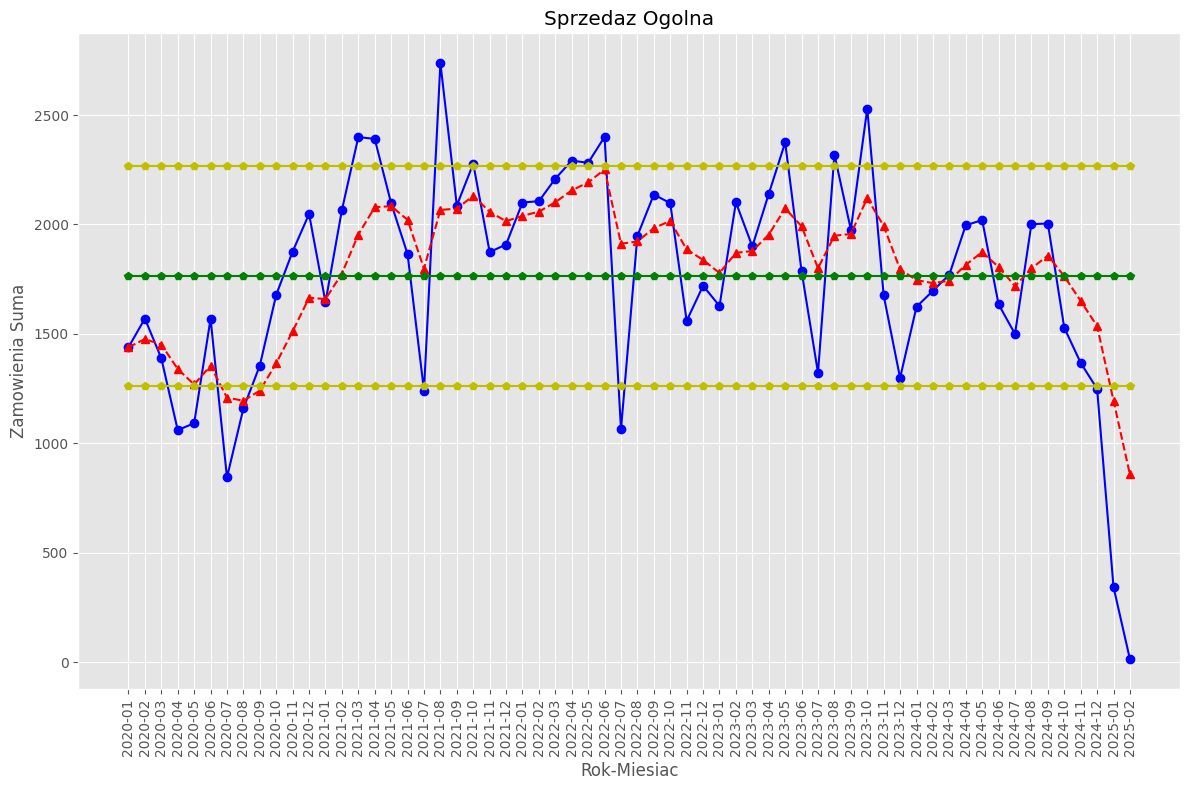

In [40]:
plt.figure(figsize=(12, 8))
plt.plot(monthly_sales['RokMiesiac'].astype(str), monthly_sales['ILOSC'], marker='o', color='b', linestyle='-')
plt.plot(monthly_sales['RokMiesiac'].astype(str), monthly_sales['ILOSC'].ewm(span=6, adjust=False).mean(), marker='^', color='r', linestyle='--')
plt.plot(monthly_sales['RokMiesiac'].astype(str), [monthly_sales['ILOSC'].mean() for x in range(monthly_sales['ILOSC'].shape[0])], marker='p', color='g', linestyle='-')
plt.plot(monthly_sales['RokMiesiac'].astype(str), [monthly_sales['ILOSC'].mean()+monthly_sales['ILOSC'].std() for x in range(monthly_sales['ILOSC'].shape[0])], marker='p', color='y', linestyle='-')
plt.plot(monthly_sales['RokMiesiac'].astype(str), [monthly_sales['ILOSC'].mean()-monthly_sales['ILOSC'].std() for x in range(monthly_sales['ILOSC'].shape[0])], marker='p', color='y', linestyle='-')
plt.xticks(rotation=90)
plt.xlabel('Rok-Miesiac')
plt.ylabel('Zamowienia Suma')
plt.title(f'Sprzedaz Ogolna')
plt.grid(True)
plt.tight_layout()
plt.show()

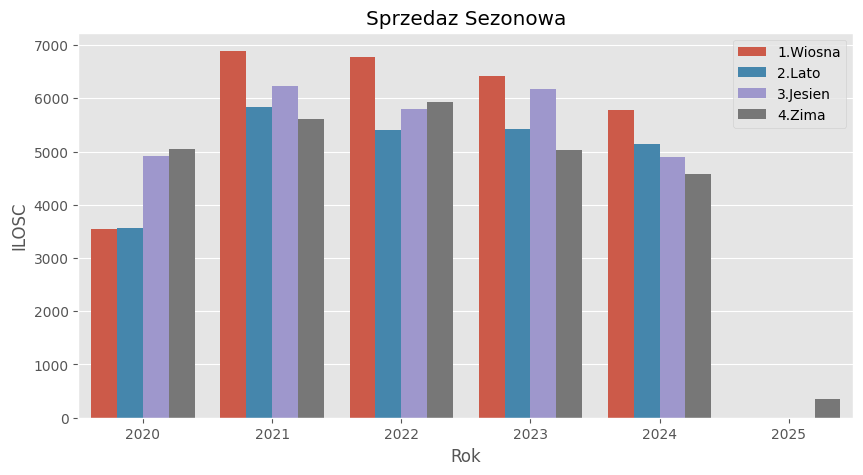

In [41]:
season_sales_over_sesons = data.groupby(["Rok", "Sezon"]).agg({"ILOSC": "sum"}).reset_index()
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(season_sales_over_sesons, x="Rok", y="ILOSC", hue="Sezon")
ax.set_title('Sprzedaz Sezonowa')
ax.set_xlabel('Rok')
ax.set_ylabel('ILOSC')
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

In [42]:
# for r in sales_per_client[sales_per_client["Cumulative_Perc"] <= 80]["KLIENCI_OPIS"]:
#   season_sales_over_sesons_by_client(r)


In [43]:
def pivot_table_for_client(client_name, kwartal="2022Q1"):
  client = data.query(f"KLIENCI_OPIS.str.contains('{client_name}')")

  pvt_table = pd.pivot_table(client[client.Kwartal >= kwartal], index="FAMILY_OPIS", values="ILOSC", columns="Kwartal", aggfunc="sum", fill_value=0)
  pvt_table["SUM"] = pvt_table.sum(axis=1)

  return pvt_table.sort_values(by="SUM", ascending=False)

def pivot_table_for_client_and_models(client_name, model, kwartal="2022Q1"):
  client = data.query(f"KLIENCI_OPIS.str.contains('{client_name}') & FAMILY_OPIS.str.contains('{model}')")

  pvt_table = pd.pivot_table(client[client.Kwartal >= kwartal], index="OPIS", values="ILOSC", columns="Kwartal", aggfunc="sum", fill_value=0)
  pvt_table["SUM"] = pvt_table.sum(axis=1)

  return pvt_table.sort_values(by="SUM", ascending=False)

def pivot_table_for_client_and_models(client_name, model, kwartal="2022Q1"):
  client = data.query(f"KLIENCI_OPIS.str.contains('{client_name}') & FAMILY_OPIS.str.contains('{model}')")

  pvt_table = pd.pivot_table(client[client.Kwartal >= kwartal], index="OPIS", values="ILOSC", columns="Kwartal", aggfunc="sum", fill_value=0)
  pvt_table["SUM"] = pvt_table.sum(axis=1)

  return pvt_table.sort_values(by="SUM", ascending=False)

def monthly_sales_client_models(klient_opis:str, data_start:str):
  sales_per_client = data.query(f"KLIENCI_OPIS.str.contains('{klient_opis}') & LISTA_ZAL_DATA_WYS >= '{data_start}'").groupby("FAMILY_OPIS")["ILOSC"].sum().reset_index()
  sales_per_client = sales_per_client.sort_values(by="ILOSC", ascending=False)
  total_sales = sales_per_client["ILOSC"].sum()
  sales_per_client["Perc"] = (sales_per_client["ILOSC"] / total_sales) * 100
  sales_per_client["Cumulative_Perc"] = sales_per_client["Perc"].cumsum()
  return sales_per_client[sales_per_client["Cumulative_Perc"] <= 80]

In [44]:
monthly_sales_client_models("SYMPA", "2023-01-01")

,FAMILY_OPIS,ILOSC,Perc,Cumulative_Perc
36,STONE,3768.0,15.242164,15.242164
13,HORIZON A,3072.0,12.426732,27.668896
29,POD. DEK.,1547.0,6.257863,33.926758
27,OVAL,1465.0,5.926160,39.852918
20,LOBBY,1395.0,5.642998,45.495916
7,DODATKI,1316.9,5.327071,50.822988
32,REVERSO,1168.0,4.724747,55.547735
5,DIVA A,1044.0,4.223147,59.770882
40,WILLOW,1044.0,4.223147,63.994029
19,LENOX,1022.0,4.134154,68.128183


In [45]:
pivot_table_for_client("SYMPA", "2023Q1").iloc[:monthly_sales_client_models("SYMPA", "2023-01-01").shape[0],:]

Kwartal,2023Q1,2023Q2,2023Q3,2023Q4,2024Q1,2024Q2,2024Q3,2024Q4,2025Q1,SUM
FAMILY_OPIS,,,,,,,,,,
STONE,523.0,524.0,473.0,387.0,549.0,487.0,459.0,343.0,23.0,3768.0
HORIZON A,442.0,484.0,325.0,351.0,341.0,528.0,341.0,221.0,39.0,3072.0
POD. DEK.,205.0,245.0,141.0,213.0,156.0,218.0,207.0,148.0,14.0,1547.0
OVAL,210.0,197.0,164.0,195.0,210.0,166.0,201.0,99.0,23.0,1465.0
LOBBY,281.0,181.0,118.0,189.0,219.0,101.0,167.0,122.0,17.0,1395.0
DODATKI,211.3,222.0,257.0,181.0,161.0,141.6,66.5,76.5,0.0,1316.9
REVERSO,93.0,111.0,141.0,178.0,206.0,209.0,122.0,104.0,4.0,1168.0
DIVA A,160.0,179.0,133.0,115.0,77.0,120.0,172.0,81.0,7.0,1044.0
WILLOW,85.0,148.0,165.0,180.0,59.0,171.0,142.0,84.0,10.0,1044.0


In [46]:
pivot_table_for_client_and_models("SYMPA", "HORIZON A", "2023Q1")

Kwartal,2023Q1,2023Q2,2023Q3,2023Q4,2024Q1,2024Q2,2024Q3,2024Q4,2025Q1,SUM
OPIS,,,,,,,,,,
HORIZON A L2Hz],34.0,49.0,28.0,30.0,30.0,42.0,30.0,20.0,1.0,264.0
HORIZON A PD 449 III 50x50,29.0,39.0,36.0,23.0,30.0,19.0,50.0,8.0,2.0,236.0
HORIZON A [L2Hz,35.0,40.0,19.0,19.0,23.0,36.0,18.0,14.0,4.0,208.0
"HORIZON A [3,5z",26.0,38.0,24.0,23.0,20.0,32.0,18.0,12.0,0.0,193.0
HORIZON A ONz,21.0,23.0,21.0,19.0,14.0,35.0,16.0,9.0,2.0,160.0
HORIZON A LHz],20.0,18.0,22.0,22.0,13.0,31.0,12.0,9.0,3.0,150.0
"HORIZON A 3,5z]",24.0,31.0,9.0,13.0,13.0,26.0,17.0,13.0,0.0,146.0
"HORIZON A [3,5z]",13.0,18.0,16.0,15.0,14.0,19.0,18.0,10.0,0.0,123.0
HORIZON A [LHz,21.0,23.0,11.0,12.0,9.0,17.0,16.0,8.0,3.0,120.0


In [47]:
def sales_over_time_client(client_name):

  client = monthly_sales_client.query(f"KLIENCI_OPIS.str.contains('{client_name}')").groupby("RokMiesiac", as_index=False).ILOSC.sum()

  plt.figure(figsize=(12, 8))
  plt.plot(client['RokMiesiac'].astype(str), client['ILOSC'], marker='o', color='b', linestyle='-', label="Zamowiania Razem")
  plt.plot(client['RokMiesiac'].astype(str), client['ILOSC'].ewm(span=6, adjust=False).mean(), marker='^', color='r', linestyle='--', label="EWM(6)")

  plt.xticks(rotation=45)
  plt.xlabel('Rok-Miesiac')
  plt.ylabel('Zamowiania Razem')
  plt.title(f'Sales Trend Over Time {client_name}')
  plt.grid(True)
  plt.legend()
  plt.tight_layout()
  plt.show()

In [48]:
# for r in sales_per_client[sales_per_client["Cumulative_Perc"] <= 80]["KLIENCI_OPIS"]:
#   sales_over_time_client(r)

In [49]:
def sales_trend_over_time(falily_opis, ewm_=6):



  plt.figure(figsize=(15, 6))
  plt.plot(monthly_sales_model[monthly_sales_model.FAMILY_OPIS == falily_opis]['RokMiesiac'].astype(str), 
           monthly_sales_model[monthly_sales_model.FAMILY_OPIS == falily_opis]['ILOSC'], marker='o', color='b', linestyle='-', label="Sales")
  plt.plot(monthly_sales_model[monthly_sales_model.FAMILY_OPIS == falily_opis]['RokMiesiac'].astype(str),
           monthly_sales_model[monthly_sales_model.FAMILY_OPIS == falily_opis]['ILOSC'].ewm(span=ewm_, adjust=False).mean(), marker='^', color='r', linestyle='--', label=f"EWM({ewm_})")
  plt.xticks(rotation=90)
  plt.xlabel('Rok-Miesiac')
  plt.ylabel('Zamowienia Razem')
  plt.title(f'Sales Trend Over Time {falily_opis}')
  plt.grid(True)
  plt.legend()
  plt.tight_layout()
  plt.show()


def pivot_table_of_model_sales(model, quartal, std_=1):
  
  df = data.query(f"FAMILY_OPIS.str.contains('{model}')")
  df["Kwartal"] = df.LISTA_ZAL_DATA_WYS.dt.to_period("Q")
  pvt_table = pd.pivot_table(df[df.Kwartal >= quartal], index="OPIS", values="ILOSC", columns="Kwartal", aggfunc="sum")
  pvt_table["SUM_LAST_4&3_Q"] = pvt_table.iloc[:, -4:-2].sum(axis=1)
  pvt_table["SUM_LAST_3&2_Q"] = pvt_table.iloc[:, -4:-2].sum(axis=1)
  pvt_table["SUM_LAST_2_Q"] = pvt_table.iloc[:, -4:-2].sum(axis=1)
  pvt_table["MEAN_Q"] = np.round(pvt_table.iloc[:, :-3].mean(axis=1),0)
  pvt_table["STD_Q"] = np.round(pvt_table.iloc[:, :-4].std(axis=1),0)
  pvt_table["MEAN_SUM_LAST"] = np.round(pvt_table.iloc[:, -5:-2].mean(axis=1),0)
  pvt_table["STD_SUM_LAST"] = np.round(pvt_table.iloc[:, -6:-3].std(axis=1),0)
  pvt_table["STAN_MAX_6M_Q"] = np.round(pvt_table["MEAN_Q"] + (std_ * pvt_table["STD_Q"]),0)
  # pvt_table["STAN_MAX_6M_LAST"] = np.round(pvt_table["MEAN_SUM_LAST"] + (2 * pvt_table["STD_SUM_LAST"]),0)

  return pvt_table



In [50]:
data.columns

Index(['OPIS', 'ILOSC', 'FAMILY_OPIS', 'LISTA_ZAL_DATA_WYS', 'KLIENCI_OPIS',
       'ZAMOWIENIE_DATA_WP', 'NR_KOMISJI', 'ZAMOWIENIE_Z_DNIA', 'PP',
       'LISTA_ZAL_KOD', 'REALIZ_UWAGA', 'CENA_NETTO', 'KLIENT', 'WALUTA',
       'CENA_PLN', 'RokMiesiac', 'Rok', 'Kwartal', 'Sezon'],
      dtype='object')

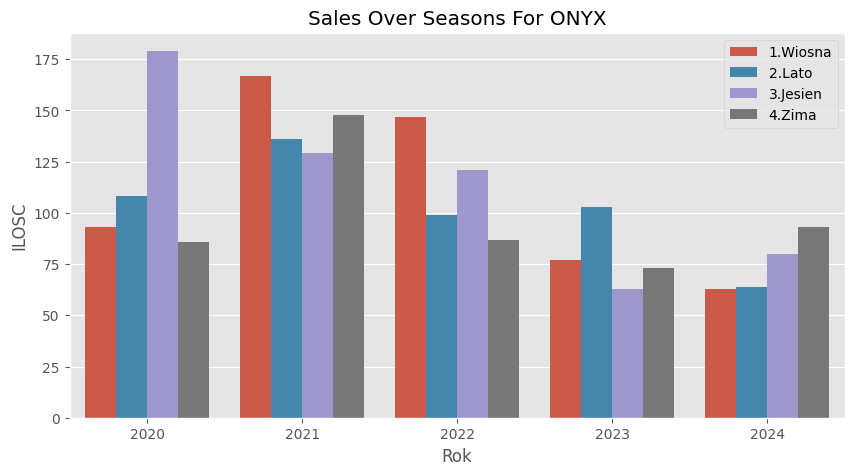

In [51]:
season_sales_over_sesons_by_model("ONYX")

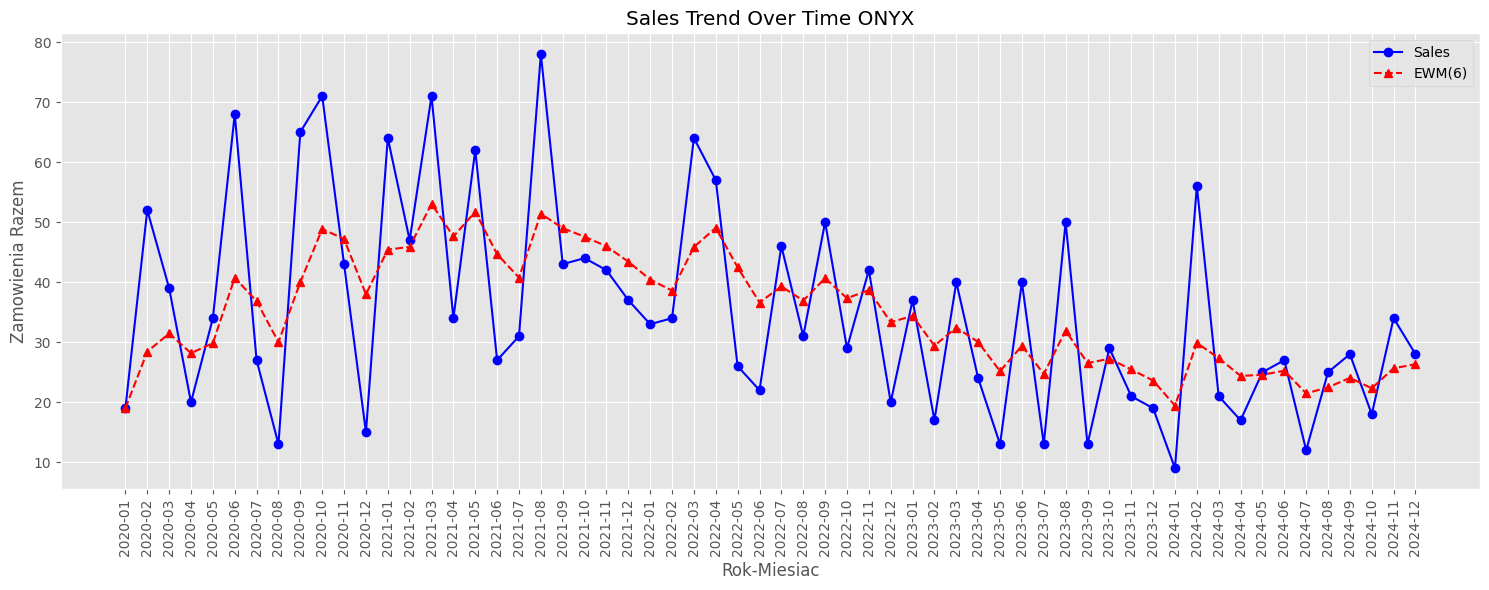

In [52]:
sales_trend_over_time("ONYX")

In [53]:
pivot_table_of_model_sales("ONYX", "2023Q1")


Kwartal,2023Q1,2023Q2,2023Q3,2023Q4,2024Q1,2024Q2,2024Q3,2024Q4,SUM_LAST_4&3_Q,SUM_LAST_3&2_Q,SUM_LAST_2_Q,MEAN_Q,STD_Q,MEAN_SUM_LAST,STD_SUM_LAST,STAN_MAX_6M_Q
OPIS,,,,,,,,,,,,,,,,
ONYX 131N,3.0,1.0,1.0,2.0,NaN,3.0,1.0,3.0,3.0,4.0,4.0,2.0,1.0,4.0,1.0,3.0
"ONYX 2,5",NaN,1.0,2.0,1.0,5.0,6.0,1.0,1.0,11.0,7.0,2.0,2.0,2.0,7.0,5.0,4.0
"ONYX 2,5N",2.0,1.0,1.0,NaN,5.0,2.0,2.0,NaN,7.0,4.0,2.0,2.0,1.0,4.0,3.0,3.0
"ONYX 2,5]",5.0,1.0,6.0,3.0,3.0,4.0,4.0,4.0,7.0,8.0,8.0,4.0,1.0,8.0,1.0,5.0
ONYX 3,1.0,1.0,1.0,NaN,1.0,NaN,1.0,3.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0
"ONYX 3,5",1.0,1.0,NaN,2.0,1.0,2.0,1.0,1.0,3.0,3.0,2.0,1.0,0.0,3.0,1.0,1.0
"ONYX 3,5N",2.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
"ONYX 3,5]",3.0,5.0,3.0,3.0,2.0,3.0,3.0,3.0,5.0,6.0,6.0,3.0,1.0,6.0,1.0,4.0
ONYX 3N,2.0,NaN,2.0,4.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,3.0
